<a href="https://colab.research.google.com/github/Tankasala25/PyTorch/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What This Model Is Doing With the Iris Dataset

The Iris dataset contains **150 iris flowers**, and each flower has **4 measurements**:

- **Sepal length (cm)**
- **Sepal width (cm)**
- **Petal length (cm)**
- **Petal width (cm)**

Each flower belongs to one of **3 species**:

- **0 → Iris-setosa**
- **1 → Iris-versicolor**
- **2 → Iris-virginica**

---

## What the Model is Actually Doing

Our neural network takes these **4 measurements as input** and tries to **predict which flower species** it belongs to.

The model learns patterns such as:

- Flowers with **small petal length** → usually **Setosa**
- Flowers with **medium petal length** → usually


In [182]:
from sklearn.datasets import load_iris          # imports function to load the Iris dataset
import pandas as pd                             # imports pandas for DataFrame operations
import torch                                     # imports PyTorch for tensor operations
import torch.nn as nn                            # imports neural network layers (Linear, ReLU, etc.)
import torch.nn.functional as F                  # imports functional API (relu, softmax, etc.)
import matplotlib.pyplot as plt                  # imports matplotlib for plotting graphs

iris = load_iris()                               # loads the Iris dataset into 'iris'
dir(iris)                                        # lists all available attributes inside the iris dataset object


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [183]:
# create a DataFrame using the flower measurement values and assign column names
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# add the target (flower species labels) as a new column
df["target"] = iris.target


print(df.count()) #to count how may values
print(df.isnull().sum()) # to check is there any null values
print(df.shape) #print shape

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
(150, 5)


In [184]:
# select all columns except 'target' as input features (X)
X = df.drop('target', axis=1)

# select only the 'target' column as the output labels (y)
y = df['target']


In [185]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [186]:
# import the function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# split the data: 80% for training, 20% for testing (random_state ensures same split every run)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [187]:
class IrisModel(nn.Module):

  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.fc3=nn.Linear(h2,out_features)

  def forward(self, X):
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return X



In [188]:
# set a random seed so that weights are initialized the same every time (reproducibility)
torch.manual_seed(40)

# create an instance of the IrisModel neural network
model = IrisModel()

# display all learnable parameters (weights and biases) of the model
list(model.parameters())


[Parameter containing:
 tensor([[-0.1321,  0.3661, -0.3263,  0.2157],
         [ 0.3649, -0.0122,  0.0501, -0.3682],
         [-0.2103, -0.4293,  0.3016, -0.1756],
         [ 0.2583,  0.3896,  0.1959, -0.0190],
         [ 0.3545, -0.3870,  0.1779, -0.4827],
         [-0.3797, -0.3637,  0.3089,  0.3229],
         [-0.1241, -0.4705, -0.0868, -0.4209],
         [-0.4511,  0.4287, -0.0076,  0.3416]], requires_grad=True),
 Parameter containing:
 tensor([-0.3244,  0.0687, -0.0553, -0.4690,  0.3368, -0.2117,  0.2755,  0.0372],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0678, -0.0870,  0.3406,  0.2542, -0.0230, -0.2576, -0.2870,  0.3189],
         [-0.1179, -0.1866, -0.2635,  0.2054, -0.1513, -0.2263,  0.1901, -0.0019],
         [ 0.0120, -0.0493, -0.2501,  0.0536, -0.3167,  0.1003,  0.1752,  0.2120],
         [ 0.1634, -0.1110,  0.1755,  0.1620, -0.0369, -0.0116, -0.2704,  0.0187],
         [ 0.0116,  0.2322,  0.3502, -0.3447, -0.2551, -0.0304, -0.0355,  0.2153],
       

In [189]:
type(X_train)

pandas.core.frame.DataFrame

In [190]:
type(y_train.values)

numpy.ndarray

In [191]:
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [192]:
type(X_train),type(y_train)

(torch.Tensor, torch.Tensor)

In [193]:
# set the loss function for multi-class classification (compares predictions with true labels)
loss = nn.CrossEntropyLoss()

# define the optimizer (Adam) to update model weights during training
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [194]:
# number of times the model will learn from the data
epochs = 100

# list to store loss values for plotting
losses = []

# loop through all epochs
for epoch in range(epochs):

    # forward pass → model makes predictions on the training data
    y_pred = model.forward(X_train)

    # calculate how wrong the predictions are compared to the true labels
    l = loss(y_pred, y_train)

    # store current loss value (detach removes it from computation graph)
    losses.append(l.detach().numpy())

    # reset gradients to zero before each backward pass
    optimizer.zero_grad()

    # backward pass → compute gradients for all parameters
    l.backward()

    # update model weights using the optimizer
    optimizer.step()

    # print loss every 10 epochs for tracking progress
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} and loss : {l}")


Epoch : 0 and loss : 1.1502362489700317
Epoch : 10 and loss : 1.093932867050171
Epoch : 20 and loss : 1.0726178884506226
Epoch : 30 and loss : 0.9969995021820068
Epoch : 40 and loss : 0.8111255168914795
Epoch : 50 and loss : 0.5955408811569214
Epoch : 60 and loss : 0.45792242884635925
Epoch : 70 and loss : 0.38836321234703064
Epoch : 80 and loss : 0.3274684250354767
Epoch : 90 and loss : 0.23869524896144867


Text(0.5, 0, 'epochs')

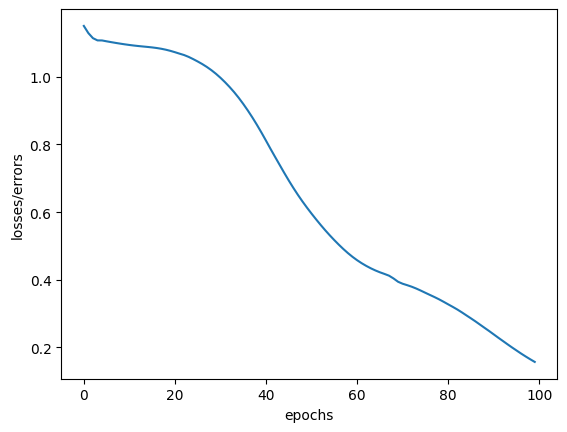

In [195]:
# plot the loss values stored during training
plt.plot(range(epochs), losses)

# label the y-axis to show it represents the loss/error values
plt.ylabel("losses/errors")

# label the x-axis to show the epoch number
plt.xlabel("epochs")


In [196]:
# evaluate the model on the test dataset
with torch.no_grad():                  # disable gradient calculation during evaluation
    y_eval = model.forward(X_test)     # make predictions on the test features
    l = loss(y_eval, y_test)           # calculate test loss using the true labels


In [197]:
# initialize a counter to count how many predictions are correct
correct = 0

# disable gradient calculations since we are only evaluating
with torch.no_grad():

    # loop through each test sample one by one
    for i, data in enumerate(X_test):

        # get the model's prediction for the current sample
        y_val = model.forward(data)

        # print sample number, raw model output, true label, and predicted label
        print(f"{i+1} \t {str(y_val)}  \t {y_test[i]}  \t {y_val.argmax().item()}")

        # check if predicted class matches the true class label
        if y_val.argmax().item() == y_test[i]:
            correct += 1

# display the total number of correct predictions
print(f"we got {correct} correct")


1 	 tensor([ 3.6539, -1.3355, -8.2724])  	 0  	 0
2 	 tensor([-2.3684,  2.7275,  1.8490])  	 1  	 1
3 	 tensor([-3.9210,  3.3182,  4.9472])  	 2  	 2
4 	 tensor([-5.0857,  4.0366,  6.5872])  	 2  	 2
5 	 tensor([-1.9467,  2.5438,  1.0654])  	 1  	 1
6 	 tensor([-4.2333,  3.4128,  5.6304])  	 2  	 2
7 	 tensor([-2.9598,  2.9683,  2.9898])  	 1  	 2
8 	 tensor([-2.0416,  2.6145,  1.1689])  	 1  	 1
9 	 tensor([-2.3714,  2.6915,  1.9473])  	 1  	 1
10 	 tensor([ 3.9970, -1.4731, -9.1922])  	 0  	 0
11 	 tensor([-2.2736,  2.6818,  1.6838])  	 1  	 1
12 	 tensor([ 3.8487, -1.3964, -8.8297])  	 0  	 0
13 	 tensor([ 3.9209, -1.4451, -8.9831])  	 0  	 0
14 	 tensor([-3.1525,  3.0487,  3.3569])  	 2  	 2
15 	 tensor([-0.8689,  2.1661, -1.2858])  	 1  	 1
16 	 tensor([-4.5166,  3.5614,  6.0946])  	 2  	 2
17 	 tensor([-3.3493,  3.1262,  3.7430])  	 2  	 2
18 	 tensor([-4.1523,  3.4932,  5.1926])  	 2  	 2
19 	 tensor([-2.7792,  3.0885,  2.1599])  	 1  	 1
20 	 tensor([-1.7689,  2.4307,  0.8236])

In [199]:
# save only the trained model parameters (weights & biases) into a .pth file
torch.save(obj=model.state_dict(), f="Iris_model.pth")

In [200]:
#to load a model we have create an instance

Iris_new_model=IrisModel()
Iris_new_model.load_state_dict(torch.load(f="Iris_model.pth"))

<All keys matched successfully>

In [201]:
Iris_new_model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.2003,  0.2977, -0.3950,  0.1441],
                      [ 0.8174,  0.3898,  0.1783, -0.5083],
                      [-0.2103, -0.4293,  0.3016, -0.1756],
                      [-0.1355, -0.2415,  0.8829,  0.7918],
                      [ 0.3504, -0.8865,  0.8683,  0.2946],
                      [-0.3797, -0.3637,  0.3089,  0.3229],
                      [-0.1241, -0.4705, -0.0868, -0.4209],
                      [-0.4511,  0.4287, -0.0076,  0.3416]])),
             ('fc1.bias',
              tensor([-0.3921,  0.5295, -0.0553, -1.1496, -0.0757, -0.2117,  0.2755,  0.0372])),
             ('fc2.weight',
              tensor([[ 0.1279,  0.0296,  0.3406,  1.1600,  0.7729, -0.2576, -0.2870,  0.3189],
                      [-0.1179, -0.1866, -0.2635,  0.2054, -0.1513, -0.2263,  0.1901, -0.0019],
                      [ 0.0120, -0.0493, -0.2501,  0.0536, -0.3167,  0.1003,  0.1752,  0.2120],
                      [ 0.2235,  0.3947,  0.1755, 

In [202]:
Iris_new_model.eval()

IrisModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)